In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
import seaborn as sns

In [5]:
import pickle

In [6]:
def model_test(preds,true):
    print("R2 Score:" ,r2_score(true,preds))
    print("Mean Absolute Error:", round(mean_absolute_error(true,preds)))
    print("Mean Squared Error:", round(np.sqrt(mean_squared_error(true,preds))))
    print("Mean of Values:", round(np.mean(y_test)))

In [7]:
df = pd.read_csv("Data/clean_data_with_features.csv", index_col=0)

In [8]:
df.drop("Offer_publication_date", axis=1, inplace=True)

In [9]:
df.drop("Features", axis=1, inplace=True)

# Delete outliers (200k+)

In [10]:
df_200k = df[df["Price"] < 200000]

In [11]:
len(df_200k) / len(df)

0.9642959317960749

# Dummies

In [12]:
df_dum = pd.get_dummies(df, drop_first=True)

In [13]:
X = df_dum.drop(["Price"], axis=1)

In [14]:
y = df_dum["Price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
preds = lm.predict(X_test)

In [20]:
model_test(y_test,preds)

R2 Score: 0.7550206046074963
Mean Absolute Error: 16915
Mean Squared Error: 29000
Mean of Values: 56740


# Lasso Regression

In [21]:
from sklearn.linear_model import Lasso

In [22]:
lasso = Lasso(alpha=1,max_iter=1000)

In [23]:
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [24]:
preds = lasso.predict(X_test)

In [25]:
model_test(preds,y_test)

R2 Score: 0.8022825865641068
Mean Absolute Error: 16904
Mean Squared Error: 29005
Mean of Values: 56740


In [26]:
pickle.dump(lasso, open("ML_models/lasso", 'wb'))

In [ ]:
for i in range(1,5):
    lasso = Lasso(alpha=i,max_iter=1000*i)
    lasso.fit(X_train,y_train)
    preds = lasso.predict(X_test)
    print("For alpha = ",i)
    model_test(preds,y_test)
    
    

# Best Lasso Model

In [ ]:
lasso = pickle.load(open("ML_models/lasso", 'rb'))

In [ ]:
preds = lasso.predict(X_test)

In [ ]:
model_test(preds,y_test)

# Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge = Ridge(alpha=5)

In [34]:
ridge.fit(X_train,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.73341e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=5)

In [35]:
preds = ridge.predict(X_test)

# The Best Ridge Model

In [36]:
model_test(preds,y_test)

R2 Score: 0.8023198233663483
Mean Absolute Error: 16920
Mean Squared Error: 29002
Mean of Values: 56740


In [37]:
pickle.dump(ridge, open("ML_models/ridge", 'wb'))

# SGD Model

In [38]:
from sklearn.linear_model import SGDRegressor

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

In [47]:
sgd = SGDRegressor(penalty="elasticnet", max_iter=2500000,alpha=0.3,random_state=101)

In [48]:
sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.3, max_iter=2500000, penalty='elasticnet',
             random_state=101)

In [49]:
preds = sgd.predict(X_test)

In [50]:
model_test(preds,y_test)

R2 Score: 0.7603117570873563
Mean Absolute Error: 16120
Mean Squared Error: 31935
Mean of Values: 56740


In [189]:
for i in range(1,10):
    sgd = SGDRegressor(penalty="elasticnet", max_iter=2500000,alpha=0.1*i,random_state=101)
    sgd.fit(X_train,y_train)
    preds = sgd.predict(X_test)
    print("For alpha =",0.1*i)
    model_test(preds,y_test)

For alpha = 0.1
R2 Score: 0.705316169327983
Mean Absolute Error: 22438
Mean Squared Error: 35410
Mean of Values: 56740
For alpha = 0.2
R2 Score: 0.7574105420720414
Mean Absolute Error: 17328
Mean Squared Error: 32128
Mean of Values: 56740
For alpha = 0.30000000000000004
R2 Score: 0.7603117570873562
Mean Absolute Error: 16120
Mean Squared Error: 31935
Mean of Values: 56740
For alpha = 0.4
R2 Score: 0.7520396312281334
Mean Absolute Error: 16190
Mean Squared Error: 32482
Mean of Values: 56740
For alpha = 0.5
R2 Score: 0.7541837768733485
Mean Absolute Error: 17265
Mean Squared Error: 32341
Mean of Values: 56740
For alpha = 0.6000000000000001
R2 Score: 0.7496365080225218
Mean Absolute Error: 17305
Mean Squared Error: 32639
Mean of Values: 56740
For alpha = 0.7000000000000001
R2 Score: 0.7452388092411207
Mean Absolute Error: 17360
Mean Squared Error: 32924
Mean of Values: 56740
For alpha = 0.8
R2 Score: 0.7409663106781648
Mean Absolute Error: 17424
Mean Squared Error: 33199
Mean of Values: 5

# Grid for SGD

In [65]:
grid_params = {"penalty" : ['elasticnet'],
             "alpha": [0.1,0.2,0.3,0.4],
               "l1_ratio":[0.15,0.2,0.3,0.4],
               "epsilon":[0.1,0.2,0.05],
                "max_iter":[2500000],
               "random_state":[101]
               
             }

In [66]:
sgd = SGDRegressor()

In [67]:
grid_sgd = GridSearchCV(SGDRegressor(),param_grid=grid_params)

In [68]:
grid_sgd.fit(X_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4],
                         'epsilon': [0.1, 0.2, 0.05],
                         'l1_ratio': [0.15, 0.2, 0.3, 0.4],
                         'max_iter': [2500000], 'penalty': ['elasticnet'],
                         'random_state': [101]})

In [69]:
preds = grid_sgd.predict(X_test)

In [70]:
model_test(preds,y_test)

R2 Score: 0.7582317346974898
Mean Absolute Error: 16110
Mean Squared Error: 32074
Mean of Values: 56740


In [71]:
pickle.dump(grid_sgd, open("ML_models/sgd", 'wb'))

# The best SGD Model

In [51]:
sgd = pickle.load(open("ML_models/sgd", 'rb'))

In [52]:
preds = sgd.predict(X_test)

In [53]:
model_test(preds,y_test)

R2 Score: 0.7582317346974898
Mean Absolute Error: 16110
Mean Squared Error: 32074
Mean of Values: 56740


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
from sklearn.model_selection import GridSearchCV

In [87]:
grid_param = {"n_estimators": [50,100],
             "max_depth": [20,30],
              "ccp_alpha":[0.015,0.02]
             }

In [88]:
grid_forest = GridSearchCV(RandomForestRegressor(),param_grid=grid_param)

In [89]:
#grid_forest.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.015, 0.02], 'max_depth': [20, 30],
                         'n_estimators': [50, 100]})

In [100]:
preds = grid_forest.predict(X_test)

In [101]:
model_test(preds,y_test)

R2 Score: 0.9413926946805014
Mean Absolute Error: 6643
Mean Squared Error: 15792
Mean of Values: 56740


In [102]:
grid_forest.best_params_

{'ccp_alpha': 0.015, 'max_depth': 20, 'n_estimators': 50}

In [22]:
forest = RandomForestRegressor(n_estimators=60, max_depth=40)

In [23]:
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=40, n_estimators=60)

In [24]:
preds = forest.predict(X_test)

In [25]:
model_test(preds,y_test)

R2 Score: 0.9462909403428407
Mean Absolute Error: 6374
Mean Squared Error: 15117
Mean of Values: 56740


In [26]:
forest = RandomForestRegressor(n_estimators=60, max_depth=40,bootstrap=False)

In [27]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, n_estimators=60)

In [28]:
preds = forest.predict(X_test)

In [29]:
model_test(preds,y_test)

R2 Score: 0.7295936336939819
Mean Absolute Error: 8802
Mean Squared Error: 33920
Mean of Values: 56740


In [30]:
forest = RandomForestRegressor(n_estimators=100, max_depth=40,bootstrap=False)

In [31]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=40)

In [32]:
preds = forest.predict(X_test)

In [33]:
model_test(preds,y_test)

R2 Score: 0.7901013525662264
Mean Absolute Error: 8771
Mean Squared Error: 29885
Mean of Values: 56740


In [31]:
score = []

In [32]:
for i in range(2,6):
    forest = RandomForestRegressor(n_estimators=30, max_depth=i*10)
    forest.fit(X_train,y_train)
    preds = forest.predict(X_test)
    score.append(r2_score(y_test,preds))
    print(r2_score)

<function r2_score at 0x00000281571614C0>
<function r2_score at 0x00000281571614C0>
<function r2_score at 0x00000281571614C0>
<function r2_score at 0x00000281571614C0>


In [37]:
score

[0.9257538339995157, 0.9293520336722458, 0.947294334952153, 0.9365935110362744]

<AxesSubplot:>

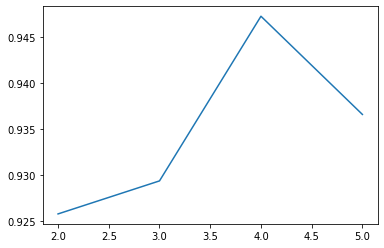

In [43]:
sns.lineplot(x=[2,3,4,5], y=score)

In [44]:
# max_depth=40 The best

In [50]:
for i in range(4,7):
    forest = RandomForestRegressor(n_estimators=i*10, max_depth=40)
    forest.fit(X_train,y_train)
    preds = forest.predict(X_test)
    score.append(r2_score(y_test,preds))
    print(r2_score(y_test,preds))

0.9398938016117054
0.92708245550391
0.9408267907965303


In [ ]:
# n_estimators=60 The best

In [63]:
forest = RandomForestRegressor(n_estimators=50, max_depth=20,ccp_alpha=0.015)

In [64]:
forest.fit(X_train,y_train)

RandomForestRegressor(ccp_alpha=0.015, max_depth=20, n_estimators=50)

In [65]:
preds = forest.predict(X_test)

In [66]:
r2_score(y_test,preds)

0.9362808990982769

In [20]:
forest = RandomForestRegressor()

In [27]:
grid_params = {"n_estimators": [10,30,50,75,100],
               "max_depth": [20,30,40],
               "bootstrap":[True,False]               
              }

In [28]:
#grid_forest = GridSearchCV(forest,param_grid=grid_params)

In [ ]:
#grid_forest.fit(X_train,y_train)

In [ ]:
#grid_forest.best

In [ ]:
# “absolute_error” is significantly slower

In [68]:
forest = RandomForestRegressor(n_estimators=50, max_depth=16, bootstrap=True,ccp_alpha=0.005)

In [69]:
forest.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.005, max_depth=16, n_estimators=50)

In [70]:
preds = forest.predict(X_test)

In [71]:
model_test(preds,y_test)

R2 Score: 0.9361642520627304
Mean Absolute Error: 7121
Mean Squared Error: 16481
Mean of Values: 56740


In [29]:
# Save model

In [72]:
pickle.dump(forest, open("ML_models/random_forest", 'wb'))

In [54]:
forest.predict(X_test)

array([ 16062.26666667,  57615.825     ,  44694.63333333, ...,
         8898.51373016, 102934.03888889,  39740.86666667])

# Best Random Forest Model

In [73]:
forest = pickle.load(open("ML_models/random_forest", 'rb'))

In [74]:
preds = forest.predict(X_test)

In [75]:
model_test(preds,y_test)

R2 Score: 0.9361642520627304
Mean Absolute Error: 7121
Mean Squared Error: 16481
Mean of Values: 56740


# Boosting methods!!!

# AdaBoost

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [22]:
weak_learner = DecisionTreeRegressor(max_depth=10) 

In [37]:
ada = AdaBoostRegressor(weak_learner,n_estimators=10)

In [38]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  n_estimators=10)

In [104]:
preds = ada.predict(X_test)

NotFittedError: This AdaBoostRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [105]:
model_test(preds,y_test)

R2 Score: 0.9413926946805014
Mean Absolute Error: 6643
Mean Squared Error: 15792
Mean of Values: 56740


In [53]:
for i in range(1,4):
    weak_learner = DecisionTreeRegressor(max_depth=i*15)
    ada = AdaBoostRegressor(weak_learner,n_estimators=5)
    ada.fit(X_train,y_train)
    preds = ada.predict(X_test)
    print("For max_depth:",i*15)
    model_test(preds,y_test)

For max_depth: 45
R2 Score: 0.9405921232917847
Mean Absolute Error: 7130
Mean Squared Error: 15899
Mean of Values: 56740


In [ ]:
# Best max_depth = 30

In [54]:
for i in range(1,4):
    weak_learner = DecisionTreeRegressor(max_depth=30)
    ada = AdaBoostRegressor(weak_learner,n_estimators=20*i)
    ada.fit(X_train,y_train)
    preds = ada.predict(X_test)
    print("For n_estimators:",20*i)
    model_test(preds,y_test)

For n_estimators: 20
R2 Score: 0.951306589529419
Mean Absolute Error: 6327
Mean Squared Error: 14394
Mean of Values: 56740
For n_estimators: 40
R2 Score: 0.9523244280988358
Mean Absolute Error: 6168
Mean Squared Error: 14243
Mean of Values: 56740
For n_estimators: 60
R2 Score: 0.9544545470414029
Mean Absolute Error: 6136
Mean Squared Error: 13921
Mean of Values: 56740


In [ ]:
# Odpalic

In [80]:
weak_learner = DecisionTreeRegressor(max_depth=15) 

In [81]:
ada = AdaBoostRegressor(base_estimator = weak_learner,n_estimators = 50)

In [82]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15))

In [83]:
preds = ada.predict(X_test)

In [84]:
model_test(preds,y_test)

R2 Score: 0.9481040207074727
Mean Absolute Error: 7387
Mean Squared Error: 14860
Mean of Values: 56740


In [ ]:
# Model Save

In [85]:
pickle.dump(ada, open("ML_models/Ada_Boost", 'wb'))

In [69]:
# Model Load

# The best Adaptive_Boost_Model

In [86]:
ada = pickle.load(open("ML_models/Ada_Boost", 'rb'))

In [87]:
preds = ada.predict(X_test)

In [88]:
model_test(preds,y_test)

R2 Score: 0.9481040207074727
Mean Absolute Error: 7387
Mean Squared Error: 14860
Mean of Values: 56740


# Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
gradient = GradientBoostingRegressor(n_estimators=300,max_depth=10, learning_rate = 0.15,
                                     alpha = 0.95,random_state=101)

In [94]:
gradient.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.95, learning_rate=0.15, max_depth=10,
                          n_estimators=300, random_state=101)

In [95]:
preds = gradient.predict(X_test)

In [96]:
model_test(preds,y_test)

R2 Score: 0.9409751375283611
Mean Absolute Error: 6092
Mean Squared Error: 15848
Mean of Values: 56740


In [97]:
pickle.dump(gradient, open("ML_models/Gradient_Boost", 'wb'))

In [113]:
grid_params = {"n_estimators": [300,350],
               "alpha":[0.95,0.9],
               "max_depth":[5,7,10],
               "learning_rate":[0.05,0.01],
               "ccp_alpha":[0.015,0.005]
              }

In [115]:
gradient_grid = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_params)

In [ ]:
# Na lepszym sprzecie
#gradient_grid.fit(X_train,y_train)

In [ ]:
preds = gradient_grid.predict(X_test)

In [ ]:
model_test(preds,y_test)

In [ ]:
gradient_grid.best_params_

# The best Gradient_Boost_Model

In [98]:
gradient = pickle.load(open("ML_models/Gradient_Boost", 'rb'))

In [99]:
preds = gradient.predict(X_test)

In [100]:
model_test(preds,y_test)

R2 Score: 0.9409751375283611
Mean Absolute Error: 6092
Mean Squared Error: 15848
Mean of Values: 56740


# SVM Better PC

In [101]:
from sklearn.svm import SVR

In [102]:
svr = SVR()

In [ ]:
svr.fit(X_train,y_train)

In [ ]:
preds = svr.predict(X_test)

In [ ]:
model_test(preds,y_test)

# SVR(Linear) 
# Better PC for GridCV

In [16]:
from sklearn.svm import LinearSVR

In [17]:
lsvr = LinearSVR(epsilon = 0.01,C = 2,max_iter=5000,random_state=101)

In [18]:
lsvr.fit(X_train,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=2, epsilon=0.01, max_iter=5000, random_state=101)

In [19]:
preds = lsvr.predict(X_test)

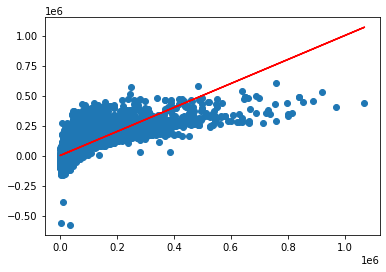

In [20]:
plt.scatter(y_test,preds)
plt.plot(y_test,y_test,'r')

In [58]:
model_test(preds,y_test)

R2 Score: 0.5359076049592195
Mean Absolute Error: 28914
Mean Squared Error: 44438
Mean of Values: 56740


# Loop SVR

In [44]:
iters = []
for i in range(3,11):
    lsvr = LinearSVR(epsilon = 0.01,C = 1,max_iter=1000 * i,random_state=101)
    lsvr.fit(X_train,y_train)
    preds = lsvr.predict(X_test)
    print("For max_iter = ", 1000*i)
    iters.append(r2_score(y_test,preds))
    model_test(preds,y_test)
    

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For max_iter =  3000
R2 Score: 0.23226983134415835
Mean Absolute Error: 39856
Mean Squared Error: 57155
Mean of Values: 56740


c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For max_iter =  4000
R2 Score: 0.500915345786059
Mean Absolute Error: 28802
Mean Squared Error: 46082
Mean of Values: 56740


c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For max_iter =  5000
R2 Score: 0.5569491082233577
Mean Absolute Error: 27762
Mean Squared Error: 43419
Mean of Values: 56740


c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For max_iter =  6000
R2 Score: 0.2434123540985632
Mean Absolute Error: 41960
Mean Squared Error: 56739
Mean of Values: 56740


c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For max_iter =  7000
R2 Score: 0.3241221775554627
Mean Absolute Error: 39247
Mean Squared Error: 53627
Mean of Values: 56740


c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For max_iter =  8000
R2 Score: 0.5736567696405336
Mean Absolute Error: 26538
Mean Squared Error: 42592
Mean of Values: 56740


c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For max_iter =  9000
R2 Score: 0.5605968717429228
Mean Absolute Error: 28524
Mean Squared Error: 43239
Mean of Values: 56740
For max_iter =  10000
R2 Score: 0.5436161160193423
Mean Absolute Error: 28071
Mean Squared Error: 44067
Mean of Values: 56740


c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
knn = KNeighborsRegressor()

In [25]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [26]:
preds = knn.predict(X_test)

In [27]:
model_test(preds,y_test)

R2 Score: 0.7967511583811593
Mean Absolute Error: 15872
Mean Squared Error: 29408
Mean of Values: 56740


# KNN Neighbors number (better PC)

In [28]:
for i in range (2,10):
    knn = KNeighborsRegressor(n_neighbors=2*i)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    print("For neighbors =",2*i)
    model_test(preds,y_test)

For neighbors = 4
R2 Score: 0.7960057945498741
Mean Absolute Error: 15825
Mean Squared Error: 29462
Mean of Values: 56740
For neighbors = 6
R2 Score: 0.7997017562865456
Mean Absolute Error: 15879
Mean Squared Error: 29194
Mean of Values: 56740
For neighbors = 8
R2 Score: 0.7996658952564512
Mean Absolute Error: 16010
Mean Squared Error: 29196
Mean of Values: 56740
For neighbors = 10
R2 Score: 0.795233792005146
Mean Absolute Error: 16190
Mean Squared Error: 29517
Mean of Values: 56740
For neighbors = 12
R2 Score: 0.7938669017400644
Mean Absolute Error: 16326
Mean Squared Error: 29616
Mean of Values: 56740
For neighbors = 14
R2 Score: 0.7910921479217305
Mean Absolute Error: 16441
Mean Squared Error: 29814
Mean of Values: 56740
For neighbors = 16
R2 Score: 0.790032611977149
Mean Absolute Error: 16533
Mean Squared Error: 29890
Mean of Values: 56740
For neighbors = 18
R2 Score: 0.7878028501461699
Mean Absolute Error: 16633
Mean Squared Error: 30048
Mean of Values: 56740


In [29]:
# neighbors = 6 is fine

# Scale Features

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [28]:
knn = KNeighborsRegressor(n_neighbors=6, p=2)

In [29]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [30]:
preds = knn.predict(X_test)

In [31]:
model_test(preds,y_test)

R2 Score: 0.8369809413781628
Mean Absolute Error: 12381
Mean Squared Error: 26337
Mean of Values: 56740


In [34]:
# Huge Size 500 MB
#pickle.dump(knn, open("ML_models/knn", 'wb'))

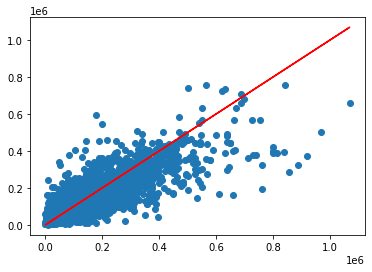

In [35]:
plt.scatter(y_test,preds)
plt.plot(y_test,y_test,'r')

# The best KNN model

In [ ]:
# Better PC

In [38]:
grid_params = {
    "n_neighbors":[6],
    "metric":["euclidean","minkowski","manhattan"],
    "p":[2,3]
    
}

In [39]:
knn = KNeighborsRegressor()

In [41]:
grid_knn = GridSearchCV(knn,param_grid=grid_params)

In [ ]:
grid_knn.fit(X_train,y_train)